<a href="https://colab.research.google.com/github/IntellSystemSEC/Imageclassifier-transferlearning/blob/main/tranferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-3-7974656d9d24>:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - accuracy: 0.2639 - loss: 2.0535 - val_accuracy: 0.3170 - val_loss: 1.8785
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.3267 - loss: 1.8531 - val_accuracy: 0.3342 - val_loss: 1.8426
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.3434 - loss: 1.8147 - val_accuracy: 0.3436 - val_loss: 1.8217
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.3524 - loss: 1.7817 - val_accuracy: 0.3461 - val_loss: 1.8140
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.3620 - loss: 1.7572 - val_accuracy: 0.3473 - val_loss: 1.8048
313/313 - 9s - 27ms/step - accuracy: 0.3473 - loss: 1.8048
Test accuracy: 0.3472999930381775
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


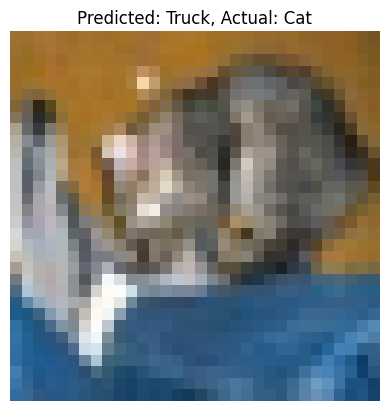

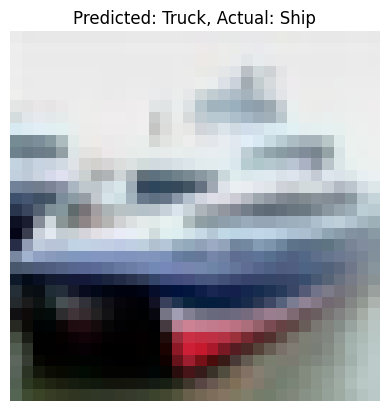

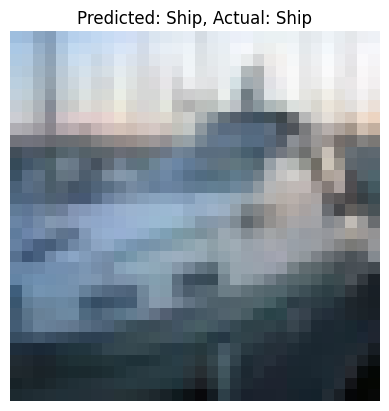

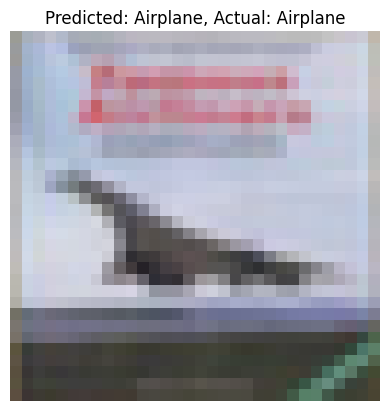

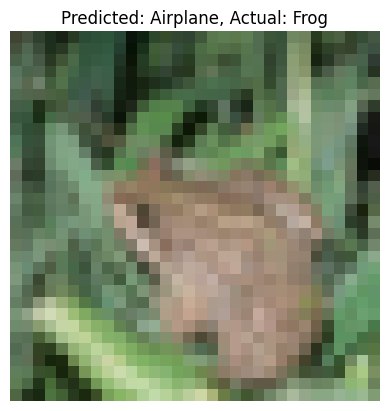

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the MobileNetV2 model without the top layer
base_model = MobileNetV2(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

# Create the model
model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Make predictions on the test set
predictions = model.predict(x_test)

# Sample output: Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()

In [6]:
model.save('Model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class for the image is: Ship


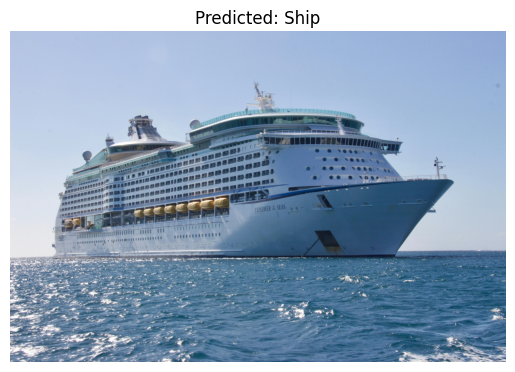

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image

# Load the CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the pre-trained model (assuming you have trained and saved it)
model = models.load_model('Model.keras')  # Replace with your model path if needed

def load_and_preprocess_image(img_path):
    """Load and preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to match CIFAR-10 input size
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]
    return img_array

def predict_image_class(img_path):
    """Predict the class of the image."""
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)[0]  # Get the index of the highest probability
    return class_names[predicted_class]

# Example usage
img_path = '/content/ship.jpg'  # Replace with the path to your image
predicted_class_name = predict_image_class(img_path)
print(f"The predicted class for the image is: {predicted_class_name}")

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()